
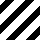
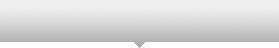
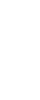
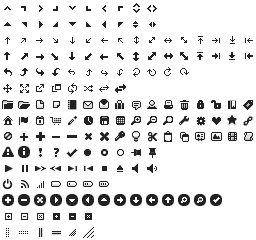
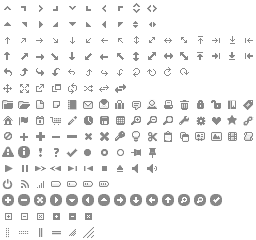
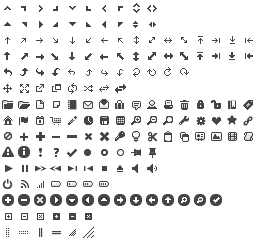
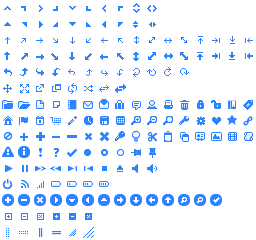
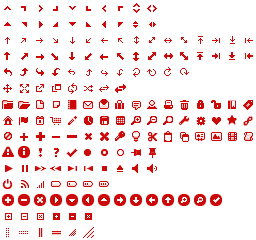
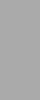
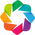
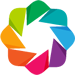
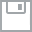
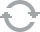
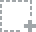
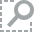
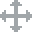
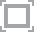
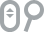

In [1]:
# Import standard packages for manipulating and visualizing data
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from bokeh.plotting import figure, output_notebook, show 
output_notebook()

In [2]:
# Statsmodel APIs
import statsmodels.api as sm

# Projectile dataset
Projectile is fired upwards from the ground. 
(a). Find a good model to fit this data.
(b). Find the time at which the projectile hit the ground.

# Summary of analysis
I analyzed the data 3 different ways:

1) First I fit a simple linear model to solve for *height* as a function of *time*.
The R^2 was 0.5 and the fit wasn't great. Just looking at the data we can tell that time and height don't have a linear relationship. 

2) Next, I added a quadratic parameter, so height would be a function of time and time-squared. Here, time-squared is a derived feature.
This fit gave an **R^2 of 0.97.** Going ahead with this model, I solved the equation for time at height=0: **at time = 3.3 seconds, the projectile hits the ground.** 

3) I fit the same quadratic equation as above, but this time removed the intercept(sm.add_constant). This made sense because at time=0, height=0, so the line should pass through the origin. 
This fit gave an **R^2 of 0.995.** Going ahead with this model, I solved the equation for time at height=0: **at time = 3.28 seconds, the projectile hits the ground.** Although the R-squared in this model was slightly better, the time predicted was almost the same as the previous approach.

In [3]:
# convert data given in the projectile problem into a dataframe called time_height_df

time = (0, 0.5, 1, 1.5, 2, 2.5)
height = (0, 20.5, 31.36, 36.25, 30.41, 28.23)
time_height_df = pd.DataFrame(zip(time,height), columns=['Time','Height'])
time_height_df

,Time,Height
0,0.0,0.00
1,0.5,20.50
2,1.0,31.36
3,1.5,36.25
4,2.0,30.41
5,2.5,28.23


In [4]:
# fit a linear regression to the data

linear_x = time_height_df['Time'].values
linear_X = sm.add_constant(linear_x,prepend=True)
linear_y = time_height_df['Height'].values
simple_linear_reg_results = sm.OLS(linear_y,linear_X).fit()

In [5]:
# output intercept, slope and R^2 of the linear regression

print "Intercept of simple linear model is {}".format(simple_linear_reg_results.params[0])
print "Coefficient of simple linear model is {}".format(simple_linear_reg_results.params[1])
print "R-squared of simple linear model is {}".format(simple_linear_reg_results.rsquared)

Intercept of simple linear model is 11.9033333333
Coefficient of simple linear model is 10.044
R-squared of simple linear model is 0.519121473799


In [51]:
# plot Height vs. Time

x = time_height_df.Time
y = time_height_df.Height

p = figure(plot_height=50,plot_width=50)
p = figure(title='Height vs Time',x_axis_label="Time", y_axis_label="Height")
p.circle(x,y,color="#A9DF99",size=8,line_width=5)

p.line(x,y,color="#A9DF99", line_width=10)

show(p)

The height appears to be going up and then coming down, so a simple linear model does not make sense. Adding a second feature which is Time-squared will make this a quadratic fit which makes sense.

In [6]:
# add a new column T2 to the dataframe which is Time-squared

time_height_df['Time**2']=(time_height_df.Time)**2

In [7]:
# fit a quadratic equation to the data

projectile_x = time_height_df[['Time','Time**2']].values
projectile_X = sm.add_constant(projectile_x, prepend=True) 
projectile_y = time_height_df['Height'].values
projectile_results = sm.OLS(projectile_y, projectile_X).fit()

In [8]:
print "Intercept is {}".format(projectile_results.params[0])
print "Coefficient of Time is {}".format(projectile_results.params[1])
print "Coefficient of Time-squared is {}".format(projectile_results.params[2])
print "R-squared of quadratic fit is {}".format(projectile_results.rsquared)

Intercept is 1.17714285714
Coefficient of Time is 42.2225714286
Coefficient of Time-squared is -12.8714285714
R-squared of quadratic fit is 0.973803530607


In [9]:
# visualize regression results
projectile_results.summary()

/Users/PoonamRath/anaconda/lib/python2.7/site-packages/statsmodels/stats/stattools.py:72: UserWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  "samples were given." % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.974
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     55.76
Date:                Mon, 23 Nov 2015   Prob (F-statistic):            0.00424
Time:                        14:34:56   Log-Likelihood:                -12.448
No. Observations:                   6   AIC:                             30.90
Df Residuals:                       3   BIC:                             30.27
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          1.1771      2.469      0.477      0.666        -6.682     9.036
x1            42.2226      4.646      9.088      0.003        27.438    57.007
x2           -12.8714      1.784     -7.216      0.005       -18.548    -7.195
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.645
Prob(Omnibus):                    nan   Jarque-Bera (JB):                1.010
Skew:                          -0.984   Prob(JB):                        0.603
Kurtosis:                       2.587   Cond. No.                         17.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

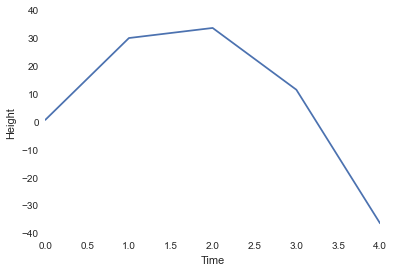

In [10]:
# plot the quadratic fit

% matplotlib inline
intercept = projectile_results.params[0]
slope1 = projectile_results.params[1]
slope2 = projectile_results.params[2]
x = range(0,5)
y = []
for ii in x:
    y.append(intercept+(slope1*ii)+(slope2*(ii**2)))


plt.plot(x,y)
plt.xlabel('Time')
plt.ylabel('Height')
plt.show()

In [13]:
# plot quadratic fit using bokeh

p = figure(height=30,width=30)
p = figure(title='Height vs Time',x_axis_label="Time", y_axis_label="Height")
p.circle(x,y,color="#B3DE69",size=8,line_width=5)

p.line(x,y,color="#B3DE69", line_width=10)

show(p)

The equation to solve is:

**y = beta_not + beta1*Time + beta2*(Time-squared)**

y = 0; beta_not = 1.1771; beta1 = 42.2226; beta2 = -12.8714

0 = 1.1771 + (42.2226*Time) - (12.8714*Time-squared)

In [14]:
# make a new column model with predicted time

time_height_df['model']=(intercept+(slope1*time_height_df.Time)+(slope2*time_height_df.Time**2))
time_height_df

,Time,Height,Time**2,model
0,0.0,0.00,0.00,1.177143
1,0.5,20.50,0.25,19.070571
2,1.0,31.36,1.00,30.528286
3,1.5,36.25,2.25,35.550286
4,2.0,30.41,4.00,34.136571
5,2.5,28.23,6.25,26.287143


In [15]:
# solve for equation 

from sympy.solvers import solve
from sympy import Symbol
x = Symbol('x')
solution = solve(intercept + slope1 * x + slope2 * (x**2), x)

In [16]:
# print the time at which height will be 0

print "time at which height is zero: {}".format(solution[1])

time at which height is zero: 3.30797942914729


In [17]:
# fit the same quadratic fit as above but this time with intercept set to 0

intercept0_x = time_height_df[['Time','Time**2']].values
#intercept0_X = sm.add_constant(intercept0_x, prepend=True) 
intercept0_y = time_height_df['Height'].values
intercept0_results = sm.OLS(intercept0_y, intercept0_x).fit()

In [18]:
intercept0_results.params

array([ 43.91151553, -13.38322981])

In [19]:
print "Coefficient of Time is {}".format(intercept0_results.params[0])
print "Coefficient of Time-squared is {}".format(intercept0_results.params[1])
print "R-squared of quadratic fit is {}".format(intercept0_results.rsquared)

Coefficient of Time is 43.911515528
Coefficient of Time-squared is -13.3832298137
R-squared of quadratic fit is 0.994603129945


In [29]:
# solve equation 

x = Symbol('x')
solution = solve(slope1 * x + slope2 * (x**2), x)
print "time at which projectile reaches the ground: {}".format(solution[1])

time at which projectile reaches the ground: 3.28108506984731


# Healthcare dataset
(a). Find a good model to fit this data.
(b). Find the time the average healthcare cost will reach $2800 per person.

# Model prediction

I fit a simple linear model, where heathcare cost is y (the dependent variable) and time is x (the independent variable). The R-squared value was 0.995 and the fit seemed appropriate.

**Based on the linear model, in the year 2005, the average health cost will be $2800 per individual.**

In [30]:
# convert data given into a dataframe called year_cost_df

year = (1976, 1980, 1987, 1993, 1998)
cost = (618, 860, 1324, 1865, 2256)
year_cost_df = pd.DataFrame(zip(year,cost), columns=['Year','Cost'])
year_cost_df

,Year,Cost
0,1976,618
1,1980,860
2,1987,1324
3,1993,1865
4,1998,2256


In [41]:
# plot year against cost

% matplotlib inline
p = figure(height=300,width=300)
p = figure(title='Healthcare Cost vs Time',x_axis_label="Year", y_axis_label="Cost")
p.circle(x,y,color="red",size=8,line_width=5)

p.line(year_cost_df.Year,year_cost_df.Cost,color="red", line_width=5)

show(p)

The trend above seems to be linear. It makes sense to do a simple linear fit.

In [52]:
# fit a linear regression to the data

yearcost_x = year_cost_df[['Year']].values
yearcost_X = sm.add_constant(yearcost_x, prepend=True) ## remember to use this otherwise youre forcing model to pass through origin
yearcost_y = year_cost_df['Cost'].values
yearcost_results = sm.OLS(yearcost_y, yearcost_X).fit()
print yearcost_results.params
print "R-squared value is: {}".format(yearcost_results.rsquared)

[ -1.48005980e+05   7.51915545e+01]
R-squared value is: 0.995140125376


In [37]:
## find the year when the healthcare cost per individual will be $2800
# solving for x:

x = (2800+148000)/75.2
print "Predicted year when healthcare cost per individual will be $2800: {}".format(int(round(x)))

Predicted year when healthcare cost per individual will be $2800: 2005


In [70]:
# import statsmodels.formula.api as smf
# mod = smf.ols(formula='Cost ~ 1 + Year', data=health_df)
# res = mod.fit()
# res.summary()

/Users/PoonamRath/anaconda/lib/python2.7/site-packages/statsmodels/stats/stattools.py:72: UserWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  "samples were given." % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Cost   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                     614.3
Date:                Sun, 22 Nov 2015   Prob (F-statistic):           0.000144
Time:                        22:22:46   Log-Likelihood:                -25.840
No. Observations:                   5   AIC:                             55.68
Df Residuals:                       3   BIC:                             54.90
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept   -1.48e+05   6027.491    -24.555      0.000     -1.67e+05 -1.29e+05
Year          75.1916      3.034     24.785      0.000        65.537    84.846
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   1.733
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.652
Skew:                          -0.817   Prob(JB):                        0.722
Kurtosis:                       2.322   Cond. No.                     4.88e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.88e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Dataset 3
(a) Find a good model to fit the data (b) Use different forms fo regularization; choose one

# Summary of analysis

The graph below appears parabolic. Fitting a simple linear model gave me a poor R-squared of 0.31. I tried fitting a parabolic equation with Y-squared as a function of x and obtained a better R-squared of 0.6.

Note on regularization:

Since there is only one feature to begin with, regularization can't be applied here.

In [3]:
# convert data into a dataframe called XY_df

X = (-1,0,1,2,3,5,7,9)
Y = (-1,3,2.5,5,4,2,5,4)
XY_df = pd.DataFrame(zip(X,Y), columns=['X','Y'])
XY_df

,X,Y
0,-1,-1.0
1,0,3.0
2,1,2.5
3,2,5.0
4,3,4.0
5,5,2.0
6,7,5.0
7,9,4.0


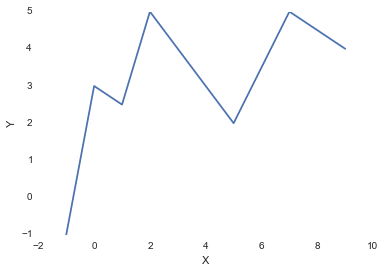

In [68]:
# Plot X against Y

plt.plot(XY_df.X,XY_df.Y)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [10]:
# fit a linear regression to the data

x = XY_df['X'].values
#sm.add_constant adds a column of ones to allow for finding an intercept to your data.
X = sm.add_constant(x, prepend=True) 
y = XY_df['Y'].values
XY_results = sm.OLS(y,X).fit()

In [69]:
print "R-squared for linear fit: {}". format(XY_results.rsquared)

R-squared for linear fit: 0.310357792683


In [12]:
# fit a model where Y-squared is a function of x

XY_x = XY_df['X'].values
#XY_X = sm.add_constant(XY_x, prepend=True)
Ysq = (XY_df['Y'])**2
XY_y = Ysq.values
XY_parabolic_results = sm.OLS(XY_y, XY_x).fit()

In [70]:
print "R-squared for parabolic fit: {}".format(XY_parabolic_results.rsquared)

R-squared for parabolic fit: 0.605825436312


# Wine dataset analysis

In [71]:
# Read wine dataset into dataframe called wine_df

input_csv = "/Users/PoonamRath/Desktop/winequality_red.csv"
wine_df = pd.read_csv(input_csv, header=None)
wine_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
1,7.4,0.7,0,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
2,7.8,0.88,0,2.6,0.098,25,67,0.9968,3.2,0.68,9.8,5
3,7.8,0.76,0.04,2.3,0.092,15,54,0.997,3.26,0.65,9.8,5
4,11.2,0.28,0.56,1.9,0.075,17,60,0.998,3.16,0.58,9.8,6


In [72]:
# set columns in wine_df

wine_df.columns = wine_df.ix[0,:]
wine_df = wine_df.drop(0,axis=0)

In [73]:
wine_df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
1,7.4,0.7,0,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
2,7.8,0.88,0,2.6,0.098,25,67,0.9968,3.2,0.68,9.8,5
3,7.8,0.76,0.04,2.3,0.092,15,54,0.997,3.26,0.65,9.8,5
4,11.2,0.28,0.56,1.9,0.075,17,60,0.998,3.16,0.58,9.8,6
5,7.4,0.7,0,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5


In [74]:
# check for null values
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1599 entries, 1 to 1599
Data columns (total 12 columns):
fixed_acidity           1599 non-null object
volatile_acidity        1599 non-null object
citric_acid             1599 non-null object
residual_sugar          1599 non-null object
chlorides               1599 non-null object
free_sulfur_dioxide     1599 non-null object
total_sulfur_dioxide    1599 non-null object
density                 1599 non-null object
pH                      1599 non-null object
sulphates               1599 non-null object
alcohol                 1599 non-null object
quality                 1599 non-null object
dtypes: object(12)
memory usage: 162.4+ KB


There aren't any nulls in this dataset

In [76]:
wine_df.columns

Index([u'fixed_acidity', u'volatile_acidity', u'citric_acid', u'residual_sugar', u'chlorides', u'free_sulfur_dioxide', u'total_sulfur_dioxide', u'density', u'pH', u'sulphates', u'alcohol', u'quality'], dtype='object')

In [77]:
wine_df.shape

(1599, 12)

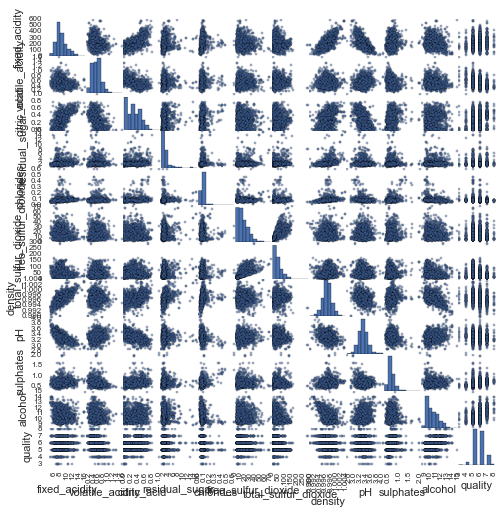

In [78]:
# Plot features against each other to get a quick view of distributions and relationships

from pandas.tools.plotting import scatter_matrix
scat = scatter_matrix(wine_df.astype(float), figsize = (8,8))

In [79]:
# find pair-wise correlations between features and output correlations that are >0.6

corr_df = wine_df.astype(float).corr()
corr_df[abs(corr_df)>0.6]

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,,,,,,,,,,,,
fixed_acidity,1.000000,NaN,0.671703,NaN,NaN,NaN,NaN,0.668047,-0.682978,NaN,NaN,NaN
volatile_acidity,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
citric_acid,0.671703,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
residual_sugar,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
chlorides,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
free_sulfur_dioxide,NaN,NaN,NaN,NaN,NaN,1.000000,0.667666,NaN,NaN,NaN,NaN,NaN
total_sulfur_dioxide,NaN,NaN,NaN,NaN,NaN,0.667666,1.000000,NaN,NaN,NaN,NaN,NaN
density,0.668047,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
pH,-0.682978,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN


**Note on correlations:** 

At a threshold of 0.6 and above, the features are correlated with each other:

1. Fixed_acidity and density are positively correlated. 
2. Fixed_acidity and citric_acid are positively correlated.
3. Fixed acidity and pH are negatively correlated.
4. Total_sulfur_dioxide and free_sulfur_dioxide are positively correlated



In [26]:
# display unique values in quality column
wine_df.quality.unique()

array(['5', '6', '7', '4', '8', '3'], dtype=object)

** The quality score has 6 discrete values - 3,4,5,6,7,8. The quality score probably represents the quality of red wine with the lowest score as 3 and highest score as 8. ** 

In [34]:
# fit linear regression using all features
wine_x = wine_df[wine_df.columns[:-1]].astype(float).values
wine_X = sm.add_constant(wine_x, prepend=True) ## remember to use this otherwise youre forcing model to pass through origin
wine_y = wine_df['quality'].astype(float).values
wine_results = sm.OLS(wine_y, wine_X).fit()

In [35]:
# display summary
wine_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.361
Model:                            OLS   Adj. R-squared:                  0.356
Method:                 Least Squares   F-statistic:                     81.35
Date:                Mon, 23 Nov 2015   Prob (F-statistic):          1.79e-145
Time:                        23:14:42   Log-Likelihood:                -1569.1
No. Observations:                1599   AIC:                             3162.
Df Residuals:                    1587   BIC:                             3227.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         21.9652     21.195      1.036      0.300       -19.607    63.538
x1             0.0250      0.026      0.963      0.336        -0.026     0.076
x2            -1.0836      0.121     -8.948      0.000        -1.321    -0.846
x3            -0.1826      0.147     -1.240      0.215        -0.471     0.106
x4             0.0163      0.015      1.089      0.276        -0.013     0.046
x5            -1.8742      0.419     -4.470      0.000        -2.697    -1.052
x6             0.0044      0.002      2.009      0.045         0.000     0.009
x7            -0.0033      0.001     -4.480      0.000        -0.005    -0.002
x8           -17.8812     21.633     -0.827      0.409       -60.314    24.551
x9            -0.4137      0.192     -2.159      0.031        -0.789    -0.038
x10            0.9163      0.114      8.014      0.000         0.692     1.141
x11            0.2762      0.026     10.429      0.000         0.224     0.328
==============================================================================
Omnibus:                       27.376   Durbin-Watson:                   1.757
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               40.965
Skew:                          -0.168   Prob(JB):                     1.27e-09
Kurtosis:                       3.708   Cond. No.                     1.13e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [36]:
wine_df.columns

Index([u'fixed_acidity', u'volatile_acidity', u'citric_acid', u'residual_sugar', u'chlorides', u'free_sulfur_dioxide', u'total_sulfur_dioxide', u'density', u'pH', u'sulphates', u'alcohol', u'quality'], dtype='object')

**Note on features:**

Based on the summary above, not all features seem to be important.

I selected features with a T-statistic of >2. This includes:
volatile_acidity; chlorides, free_sulfur_dioxide, total_sulfur_oxide, pH, sulphates, alcohol

In [41]:
# fit linear regression model with features with t-statistic >2

wine2_x = wine_df[['volatile_acidity', 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide',
                  'pH', 'sulphates','alcohol']].astype(float).values
wine2_X = sm.add_constant(wine2_x, prepend=True) 
wine2_y = wine_df['quality'].astype(float).values
wine2_results = sm.OLS(wine2_y, wine2_X).fit()

In [87]:
print "R-squared for linear model with selected features is {}".format(wine2_results.rsquared)

R-squared for linear model with selected features is 0.359470915873


Using selected features with a t-statistic >2 did not improve the R-squared much. 

In [56]:
## Scale the dataset
wine_features_df = wine_df.ix[:,:-1]
wine_features_norm = (wine_features_df.astype(float)-wine_features_df.astype(float).mean())/wine_features_df.astype(float).std()
wine_features_norm.head()    

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
1,-0.528194,0.961576,-1.391037,-0.453077,-0.243630,-0.466047,-0.379014,0.558100,1.288240,-0.579025,-0.959946
2,-0.298454,1.966827,-1.391037,0.043403,0.223805,0.872365,0.624168,0.028252,-0.719708,0.128910,-0.584594
3,-0.298454,1.296660,-1.185699,-0.169374,0.096323,-0.083643,0.228975,0.134222,-0.331073,-0.048074,-0.584594
4,1.654339,-1.384011,1.483689,-0.453077,-0.264878,0.107558,0.411372,0.664069,-0.978798,-0.461036,-0.584594
5,-0.528194,0.961576,-1.391037,-0.453077,-0.243630,-0.466047,-0.379014,0.558100,1.288240,-0.579025,-0.959946


In [88]:
# apply lasso regularization

from sklearn.linear_model import Ridge, Lasso
ridge = Ridge(alpha = .2)

lasso = Lasso(alpha = 0.1) #regularization parameter set to 0.1
lasso.fit(wine_features_norm.astype(float), wine_df['quality'].astype(float))


Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute='auto', tol=0.0001,
   warm_start=False)

In [90]:
print lasso.coef_

[ 0.         -0.15462037  0.          0.         -0.         -0.         -0.
 -0.         -0.          0.03924997  0.24952335]


Based on the coefficients above, features 2, 10, 11 -- volatile_acidity, sulphates and alcohol seem to have a significant weights on quality.

In [66]:
from sklearn.cross_validation import train_test_split

I could use logistic regression on this dataset because the quality column is categorical. Because there are more than two categories, we will need to convert each category into a dummy variable.